Based on the data provided by Udacity through its Data Analyst Nanodegree Program, this report will summarize and illustrate charts as well as report on insights of Titanic data, which contains demographics and passenger information from 891 out of 2224 passengers and crew on board.

Throughout the analysis, a number of main measures will be used frequently to answer the main questions. Examples of which include the number of passengers on board based on their passenger class: Pclass 1 for Upper Class, Pclass 2 for Middle Class, and Pclass 3 for Lower Class. 

The main thesis in this report will be based on passenger class and the variables that curculate around it. It will be answereing question of: where did most of the passengers stayed during their time on the titanic, and how do other variables, such as sex ( male or female), age, and fare that led to survival(Survived = 1) or death (Survived = 0). 


Specific Questions for this Dataset:
•	How many passengers boarded the titanic based on Pclass?
•	How many males and females were on the titanic based on Pclass?
•	How many passengers survived based on Pclass?
•	Based on those who survived and those who didn’t, were they male or female ?
•	What is the survival rate of passengers based on sex and Pclass?
•	Which age group had the most passengers on the titanic?
•	For passengers who lived,  what age group stood out?
•	What was the average age of passengers who survived based on Pclass and sex?
•	For passengers who died, what age group stood out?
•	What was the average age of passengers who died based on Pclass and sex?
•	Who didn’t pay any fare on the titanic?
•	What was the average fare for each Pclass?
•	Who paid the highest fare?
•	Who paid the lowest fare?



Comprehensively, on the Titanic, there are a total of 2224 passengers, but we will be analyzing only 891 (roughly 40 percent of all data.)
At the end of the report there will be a summary, conclusions about passengers on the titanic based on the data given. 



# 1. Introduction to the Titanic Dataset

In [3]:
# Importing libraries pertaining to this project:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [4]:
#Reading CSV File into Pandas DataFrame
titanic_set = pd.read_csv('Titanic Dataset.csv')
titanic_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Cleaning Data (Removing uneeded variables)

# Removing some data
After looking at the printout of the DataFrame containing the available information about the passengers, 
I decided to remove three of the columns. The new dataset will be called titanic_newset
Those were:


Ticket
Embarked
Cabin

In [5]:
titanic_newset = titanic_set.drop(['Ticket','Cabin', 'Embarked',], 1)
titanic_newset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


# Any Missing Values ?

There is a good number of null values for the column age. 177 is a considerable amount of null data and must be taken in consideration for further analysis.

In [35]:
titanic_newset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

# Total Passengers based on Pclass

Based on the 891 passengers recorded in the dataset, it is safe to say that the majority of passengers on the Titanic were in Pclass 3, the Lower class, with a total of 491. Pclass 1, the Upper class area, came in second with 216 passengers. P2, the middle class, came in third with the least amount of passengers with 184. This is a good start. We now know that over 50% of the passengers on board were stored in the lower deck of the ship. This could impmly that the majority of passengers in Pclass 3 had a difficult time fighting for survival than others in their respected passenger class. More analysis must me done. 

In [6]:
# Count how many passengers were within each Pclass
passenger_pclass = titanic_newset.groupby(['Pclass']).count()['PassengerId']
print(passenger_pclass)

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


# Survival based on Pclass

In the first set, we discovered that the majority of passengers on the Titanic were located in Pclass 3. According to the data below,it is shown that passengers in Pclass 3 suffered greatly as most of them died, not only within their own passenger class but out of all passenger classes in the dataset. What's interesting is that the majority of passengers in Pclass 1 were able to survive after being on the titanic. A little over 50% of passengers in Pclass 2 died during the sinking of the titanic, while the others within that class survived. 

In [7]:
pclass_survival = titanic_newset.groupby(['Pclass','Survived'])['PassengerId'].count().unstack()
print(pclass_survival)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


# Sex based on Pclass

According to the datset, males ruled the titanic in terms of population as they outnumber females in every passenger class.The males in pclass 3 outnumber all the other males in the first two classes by a longshot with 347 passengers. Another interesting note is the amount of females that were in the third passenger class. The females in that class outnumber the females in the first two classes with 144 passengers. 

In [8]:
#Create a histogram that shows the ages of people on the titanic. 
survivor_sex = titanic_newset.groupby(['Pclass','Sex'])['PassengerId'].count().unstack()
print(survivor_sex)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


# Pclass and Survival based on Sex

This bar chart analyzes the passenger class and the survival data based on whether they were male (blue) or female (green). This plot is prettt interesting. It shows for the most part women that were a priority for safety and survival, particularly within the passenger classes 1 and 2. For females in passenger class 3, according to the chart, it seems that roughly half of them survied while the other half died during the sinking of the Titanic. Many males, especially males in passenger class 3, perished while on the sinking ship when compared to the males that survived. What was interesting is the amount of males that actually survived. One thing for sure is that women and children (male or female) were priority for saftey be for adult males (atleast in the movies).



Populating the interactive namespace from numpy and matplotlib


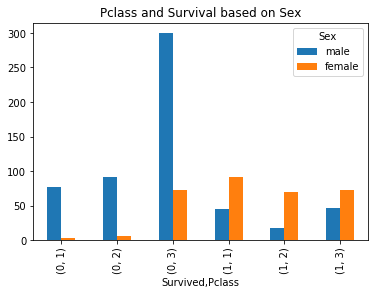

In [9]:

survivor_sex_pclass = titanic_set.groupby(['Sex','Survived','Pclass'])['PassengerId'].count().unstack('Sex')

% pylab inline
survivor_sex_pclass[['male','female']].plot(kind='bar', stacked=False) 
plt.title("Pclass and Survival based on Sex")

This set basically shows the average percentage of survival for both sexes based on passenger class. It shows that females in pclass 1 and 2 had a very high rate of survival, which means they were mostly likely to live during the sinking of titanic. Females in the third passenger class, like stated earlier, had a 50% chance of surival while on the titanic. This set alone shows that women were indeed a priority for ensuring saftey during the sinking of the titanic, but the data for men shows a differnt story. Males had less than a 50% survival rate for every pclass. Even though males had a low survival rate all across the board, men in passenger class 1 had a higher surival percentage of 36.9%. Males in passenger class 2 and 3 had percentages of 15.7% and 13.5% respectively. If you were a male on the titanic in passenger class 2 and 3, your chances of survival were very slim.

In [10]:
survival_by_sex_pclass = titanic_newset.groupby(['Sex', 'Pclass']).mean()['Survived']
survival_by_sex_pclass

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

That being said, even though it shows that women were a priority for survival, age could also play a factor (children on the ship) in the survival and non survival of passengers on the Titanic. Some questions we would like to ask consit of: What is the breakdown of age based on the passengers on the ship, what were the ages for the passangers who lived and the passengers who died, what were the ages for the passengers who lived that were male and the passengers who were female. More analysis must be done.

# Age

Before we begin, it should be noted that based on 891 passengers, 177 of them have null data for age. The data below is the statistical values for  the variable 'Age'. The dataset accounts for 891 passengers on the titanic but only has 'Age' accounted for 714 of the passengers. The average age of all passengers reported in the titanic datset is roughly 30 (29.6). The standard deviation of 'Age' in this dataset is 14.53, which tells me that the data for the variable is spread out. The youngest person on the ship is .42 years old, a baby, while the oldest person is 80 years old.

In [11]:
titanic_set[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


# Age Histogram

This histogram shows that the majority of passengers on the Titanic are in their 20s while passenegers in their 30s and 40s come in second and third respectively. It is safe to say that the majority of passengers were in between 20 and 40 years old. According to the histogram there were quite a number of kids on board the Titanic.

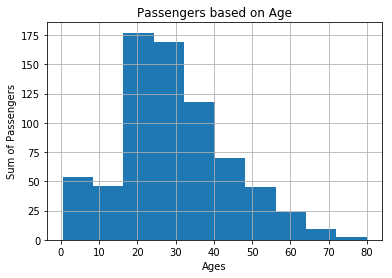

In [12]:
titanic_newset['Age'].hist()
plt.title('Passengers based on Age')
plt.xlabel('Ages')
plt.ylabel('Sum of Passengers')

To get a better understanding about age based on who survived and who didn't , I decided to create two new variables by splitting the column Survived. The first variable represents the pasengers who didn't survive while the other variable represents those who did. 

In [13]:
#Represents the passengers who died
titanic_deceased = titanic_newset[titanic_newset["Survived"] == 0]
#Represents the passengers who survived
titanic_living = titanic_newset[titanic_newset["Survived"] == 1]

# Living Passengers Based on Age

A expected, there were plenty of survivors who were in their 20s and 30s since the majority of passengers. It was interesting to see how manny children(ages 0-10) were on the titanic, ranging around 35 kids saved based on the data. 

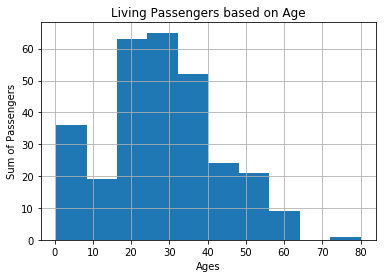

In [14]:
titanic_living.hist('Age')
plt.title('Living Passengers based on Age')
plt.xlabel('Ages')
plt.ylabel('Sum of Passengers')


# Average Ages for Living Passengers

Living males in passenger class 1 top the entire list as being the oldest with an average age of 36.24. Males in this class are also the oldest males out of all passenger classes. The average age for living females in passenger class 1 also top the list with an average age of 34.93, higher than the averages ages in the other classes. Living males in passenger class 2 had the youngest group out of all classes and sex with an average age of 16.02. The lowest average age for females comes from passenger class 3 with an average age of 19.33.

In [15]:
titanic_living.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.939024
        male      36.248000
2       female    28.080882
        male      16.022000
3       female    19.329787
        male      22.274211
Name: Age, dtype: float64

# Deceased Passengers based on Age

A expected, there were plenty of deceased passengers who were in their 20s and 30s since the majority of passengers. 

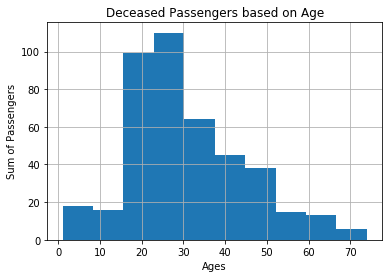

In [16]:
titanic_deceased.hist('Age')
plt.title('Deceased Passengers based on Age')
plt.xlabel('Ages')
plt.ylabel('Sum of Passengers')

# Average Ages for Deceased Passengers

Deceased males in passenger class 1 top the entire list as being the oldest with an average age of 44.58. Males in this class are also the oldest males out of all passenger classes.The average for deceased females in passenger 1 had an average age of 25.67, which comes in second for females out of all passenger classes. Deceased females in passenger class 2 had the highest average age for females with an age of 36. The average age for the youngest deceased males and females both come from passenger class 3. 


In [17]:
titanic_deceased.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    25.666667
        male      44.581967
2       female    36.000000
        male      33.369048
3       female    23.818182
        male      27.255814
Name: Age, dtype: float64

# Fare

While skimming through the dataset, I noticed that there were passengers who didn't pay any fare ( basically passengers who rode for free) on the titanic. I wanted to identify these passengers before I continued any analysis for fare.

A total of 15 passengers were on board the titanic without paying any fare. Some interesting facts about this set is that all passengers were male and had no family on board.

In [18]:
#Free_riders represents the passengers who didn't pay any fare.
free_riders = titanic_newset[titanic_newset["Fare"] == 0]
free_riders

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,0.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0


# Describing Fare Data

After excluding the passengers who didn't pay any fare, I decided to descibe the fare data by only analyzing those who paid, which has a count for 876 out of 891 passengers. According to the data, the average fare price was 32.7 dollars with a  high standard deviation of 49.93. This tells us that the prices among fares are spread out greatly. The cheapest fare a passenger has paid is 4.02 while the highest being 512.33.

In [19]:
# The average fare of for each Pclass excluding those who didnt pay any Fare.
paid_riders = titanic_newset[titanic_newset["Fare"] > 0]
paid_riders[['Fare']].describe()


,Fare
count,876.000000
mean,32.755650
std,49.936826
min,4.012500
25%,7.925000
50%,14.500000
75%,31.275000
max,512.329200


# Average Fare based on Pclass

The average fare price for passengers based on passenger class shows something very interesting. The average fare in passenger class 1 was very expensive compared to the other two with a fare of 86.14.

In [20]:
paid_riders.groupby(['Pclass'])['Fare'].mean()

Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64

Not only do females in Passenger class 1 have high survival rates, but they also have the most expensive fare according to the data with 106.125. Males in passenger class 1 also have high fare rates on average compared to the other two. Female fare averges are higher than men's fare averages in all classes. Males in passenger class 3 have the lowest fare rates.

In [21]:
paid_riders.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       70.099038
2       female     21.970121
        male       20.903064
3       female     16.118810
        male       12.809290
Name: Fare, dtype: float64

# Who paid the highest fare?

A woman by the name of Anna Ward had the highest fare out of every passenger on the ship. She was 35 and had no family members on the titanic. She was also in passenger class 1. She also surivied, as there was always a high chance she would according to the data earlier which explains that females who were in the upper class had a 97% chance of survivng.

In [22]:
#Who paid the most fare to the titanic 
#https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html
titanic_newset.loc[[paid_riders['Fare'].idxmax()]]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292


# Who paid the lowest fare?

A man by the name of Tannous Bestros had the lowest fare out of every passenger on the ship. He was 20 and had no family members on the titanic. He was also in passenger class 3. Tannous did not survive. as there was always a very low chance he would survive according to the data earlier which explains that males who were in the lower class had a 13.5% chance of survivng.

In [23]:
#Who paid the lowest fare to the titanic
#https://www.encyclopedia-titanica.org/titanic-victim/tannous-betros.html
titanic_newset.loc[[paid_riders['Fare'].idxmin()]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,4.0125


# Correlations

In [24]:
def correlation(x,y):
    std_x = ( x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return(std_x * std_y).mean()

There's a considerable positive correlation between Fare and Survival. As Fare increases, survival tends to increase as well vice versa.

In [25]:
correlation(titanic_newset['Fare'],titanic_newset['Survived'])

0.2573065223849616

There's a small positive correlation between Age and Fare. As age increases, the fare tends to increase as well vice versa.

In [26]:
correlation(titanic_newset['Fare'],titanic_newset['Age'])

0.1022879397576524

There's a considerable negative correlation between Pclass and Survival. As Pclass increases, survival tends to decrease vice versa.

In [27]:
correlation(titanic_newset['Survived'],titanic_newset['Pclass'])

-0.33848103596101325

There's a considerable negative correlation between Pclass and Age. As Pclass increases, Age tends to decrease vice versa.

In [28]:
correlation(titanic_newset['Age'],titanic_newset['Pclass'])

-0.3701365794564008

There's a considerable negative correlation between Pclass and Fare. As Pclass increases, the fare tends to decrease vice versa.

In [29]:
correlation(titanic_newset['Fare'],titanic_newset['Pclass'])

-0.5494996199439044

# Conclusion

The main ideas of this report were to help analyze passenger data of those were on the titanic based on their passenger class, how their sex and age affected their survival, how much they paid for fare, and much more that was stated in the beginning of this project. The analysis in this report was substantial enough to ask questions. Some obvious limitations was the fact that I only had access to 891 passengers instead of 2224. The age data was something that I used frequently and it was also disheartening that age only accounted for 714 passengers, which was taken into consideration when anlyzing the titanic dataset..

Per the data,  the majority of the passengers on the titanic were in pclass 3 with 491 , while pclass 2, had the fewest amount of passengers with 184. Passenger class 1 had a total of 216 and most of that class survived while more than half passengers in pclass 3 died, which could mean that passengers in pclass 1 had more access to lifeboats. There were more males on the ship than females. An interesting note is the female total in pclass 3. females in pcalss 3 had the most out of every pclass group with 144.

For the most part women that were a priority for safety and survival, particularly within the pclass 1 and 2. For females in pclass 3, half of them survied while the other half died during the sinking of the Titanic. Many males, especially males in pclass 3, perished while on the sinking ship when compared to the males that survived. Females in pclass 1 and 2 had a very high rate of survival, which means they were mostly likely to live during the sinking of titanic. Females in the third passenger class, like stated earlier, had a 50% chance of surival while on the titanic. Women were indeed a priority for ensuring saftey during the sinking of the titanic, but the data for men shows a differnt story. Males had less than a 50% survival rate for every pclass. Even though males had a low survival rate all across the board, men in pclass 1 had a higher surival percentage of 36.9%. Males in pclass 2 and 3 had percentages of 15.7% and 13.5% respectively. If you were a male on the titanic in pclass 2 and 3, your chances of survival were very slim.

Age accounted for 714 of the passengers. The average age of all passengers reported in the titanic datset is roughly 30 (29.6). The standard deviation of Age in this dataset is 14.53, which tells me that the data for the variable is spread out. The youngest person on the ship is .42 years old, a baby, while the oldest person is 80 years old. The majority of passengers on the Titanic were in their 20s while passenegers in their 30s and 40s come in second and third respectively. It is safe to say that the majority of passengers were in between 20 and 40 years old. According to the histogram there were quite a number of kids on board the titanic from ages 0-10.There were plenty of survivors who were in their 20s and 30s since the majority of passengers. It was interesting to see how manny children(ages 0-10) were on the titanic, ranging around 35 kids saved based on the data. =Living males in pclass 1 top the entire list as being the oldest with an average age of 36.24. Males in this class are also the oldest males out of all passenger classes. The average age for living females in pclass 1 also top the list with an average age of 34.93, higher than the averages ages in the other classes. Living males in pclass 2 had the youngest group out of all classes and sex with an average age of 16.02. The lowest average age for females comes from pclass 3 with an average age of 19.33.


Passengers in their 20s and 30s were the majority for deceased passengers. Deceased males in pclass 1 top the entire list as being the oldest with an average age of 44.58. Deceased males in this class are also the oldest males out of all passenger classes.The average for deceased females in pclass 1 had an average age of 25.67, which comes in second for females out of all passenger classes. Deceased females in pclass 2 had the highest average age for females with an age of 36. The average age for the youngest deceased males and females both come from pclass 3. 

A total of 15 passengers were on board the titanic without paying any fare. Some interesting facts about this set is that all passengers were male and had no family on board. The average fare price for passengers based on passenger class shows something very interesting. The average fare in pclass 1 was very expensive compared to the other two with a fare of 86.14. Pclass 2 and 3 had average fares of 21.35 and 17.38 respectively. Not only do females in pclass 1 have high survival rates, but they also have the most expensive fare according to the data with 106.125. Males in pclass 1 also have high fare rates on average compared to the other two. Female fare averges are higher than men's fare averages in all classes. Males in pclass 3 have the lowest fare rates.

A woman by the name of Anna Ward had the highest fare out of every passenger on the ship. She was 35 and had no family members on the titanic. She was also in pclass 1. She also surivied, as there was always a high chance she would according to the data earlier which explains that females who were in the upper class had a 97% chance of survivng. A man by the name of Tannous Bestros had the lowest fare out of every passenger on the ship. He was 20 and had no family members on the titanic. He was also in pclass 3. Tannous did not survive. as there was always a very low chance he would survive according to the data earlier which explains that males who were in the lower class had a 13.5% chance of survivng.

Based on the data, those who have paid a higher fare tend to have high survival rates. Passengers who are placed in a higher pclass tend to have a lower survival rate. This works vice versa. Passengers who are older tend to have a lower pclass, meaning that older passengers  tend to be in pclass 1. This works vice versa as well. Passengers who paid a higher fare also had a lower pclass. This also works vice versa. I didn't face any drastic challenges, but I did come into contact with values that had missing data and values. Like stated earlier, this dataset's limitations revolved around not having all passenger information. Having the data from every passenger could have a massive effect on our findings.

